# Looking for the makings of a hit indie game on Steam 
### by Will Chambers



### INTRO: Why are you here? 
 Now more than ever there are a lot of games on steam. With hundreds of thousands of titles already on the store, and hundreds more each week it's incredibly daunting to be in the business of trying to release a game on steam. Which, in a way, I am. I mean I have a real job too, but what I'd really like to do is release an indie hit. something like Slime Rancher, Stardew Valley, or Terraria, get a nose job, bicep implants, and retire to my mountain mansion. I don't have the magic formula for doing that as an indie, but I do have the data from 27,000 steam games to pour over and the will to use them!
    
Datascience has many powerful tools to gain insights from large ammounts of data. In this tutorial we'll see how to use those tools to decide where an Indie developer might best spend their effort to get a hit on their hands. This tutorial will show you how to use the tools of Datascience to make powerful insights in general, and how to apply those insights to steam data. 
    
 we'll start by searching the data for trends that might be useful, things like a genre that sells well, or a release window that has more sales. Anything that trends positively in ownership we'll examine. 
    
 Next, we'll determine which of those metrics seem promising, and then construct a useful model to select good game properties that a developer can control, which increase the chances that her game is successful. 
    
  The outcome will be a handy demonstration of what data can teach us about the efforts of developers that came before, which will give all of the teams out there another metric with which they can select and fine-tune their next game launch. 
    
    
    

## Background on the task: 
If you're not familiar with the indie market, here's a zero-to-hero overview. 

Indie games are games produced by small teams, sometimes single developers. These small teams generally have an even smaller budget. This lack of funding means two things, one there isn't a lot of spare cash to add things to the game willy-nilly, and two a failed launch is probably the end of the company, infact the median number of games released by an indie game company is one. 

These staggering odds make the problem of knowing ahead of time weather or not a game will do well, very important. It's essential in fact for an indie team to get this right, if they're going to then go on and make more games. 

The platform we're talking about is [Steam](https://store.steampowered.com), an online platform for the distribution of video games on the PC. Steam is of interest to indie developers because anyone can publish a game on steam for $100 via a service called Steam Direct. This ease of publishing allows developers who would normally have no way of getting a big name publisher, get their game onto steam, which is the most popular online gaming platform by far. The drawback is that many, many people do this, and so the competition is very steep. 

### Getting started: setup python

In [140]:
import pandas
import numpy
import seaborn
import sklearn
import scipy
#these libraries should get you started, make sure you have all of them installed!

## Get your data
Now, in general there are lots of ways to get data. For this tutorial I've taken the easy way out and downloaded 
the files straight from kaggle. I got them from the following link: 
https://www.kaggle.com/nikdavis/steam-store-games  

If you download that folder from kaggle you'll get the following folder or similar:   

    227895-490308-bundle-archive

Which, is about as ugly as I am on the inside, so I renamed it to: 

    steamData
 
and put it in my working directory (the same folder as your python file). 


Once you have your data locally, it's a simple matter to get it into pandas using csv_read:

In [141]:
master_data = pandas.read_csv('steamData/steam.csv')
master_data

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27070,1065230,Room of Pandora,2019-04-24,1,SHEN JIAWEI,SHEN JIAWEI,windows,0,Single-player;Steam Achievements,Adventure;Casual;Indie,Adventure;Indie;Casual,7,3,0,0,0,0-20000,2.09
27071,1065570,Cyber Gun,2019-04-23,1,Semyon Maximov,BekkerDev Studio,windows,0,Single-player,Action;Adventure;Indie,Action;Indie;Adventure,0,8,1,0,0,0-20000,1.69
27072,1065650,Super Star Blast,2019-04-24,1,EntwicklerX,EntwicklerX,windows,0,Single-player;Multi-player;Co-op;Shared/Split ...,Action;Casual;Indie,Action;Indie;Casual,24,0,1,0,0,0-20000,3.99
27073,1066700,New Yankee 7: Deer Hunters,2019-04-17,1,Yustas Game Studio,Alawar Entertainment,windows;mac,0,Single-player;Steam Cloud,Adventure;Casual;Indie,Indie;Casual;Adventure,0,2,0,0,0,0-20000,5.19


# Note: 
We're going to use pandas a lot during this tutorial, if you see something you don't understand, make sure to check out their documentation: https://pandas.pydata.org/docs/  
I'll call out specific sections of relevance as we go on. 

### TIDYING DATA
The first step is to narrow our search to something more managable. First, let's contstrain our search for trends to only indie games. Thankfully, steam puts this in the genre tag, so we can filter for it like so:

In [142]:
#get all of the games that have Indie in their genre
indie_data = master_data [ master_data['genres'].str.contains('Indie')] 

### Pandas in ten seconds or less: 
    Pandas is an extremely powerful data manipulation tool, with a lot of depth, but here are the basics: 
    Pandas stores data in DataFrames which are 2D arrays that can be indexed by any type, read more at the link below. 
    Dataframes hold Series, which are 1D arrays indexed by any type. read more at the link below! 
   [Dataframe Documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html?highlight=dataframe#pandas.DataFrame)
   [Series Documentation](https://pandas.pydata.org/docs/reference/api/pandas.Series.html?highlight=series#pandas.Series)


Next, there are some entries in this data set that simply aren't of interest to us. For instance, I don't think the 
appID is going to be of use to us. 
Thankfully it's not hard to remove columns:

In [143]:
del indie_data['appid']

I'm also going to drop a few other columns, they might be useful for some other analysies, but for my purposes they just get in the way!

In [144]:
del indie_data['english']#drop the english column, all popular games have the value 1
del indie_data['developer']#we already know that these are indie games, that's all the publisher information we need
del indie_data['genres']#redunant information, also in steamspy tags
del indie_data['required_age']# everyone lies about their age on steam anyway
del indie_data['release_date']#this one could be really interesting, but we're not focused on it right now
del indie_data['platforms']#again, potentially good to know, not interested right now

#it looks like one movie also made its way into the data, this wouldn't have been an issue if it hadn't sold
#EXTREEMELY well, and thrown off all of our analysis down the line
indie_data = indie_data.drop( indie_data[ indie_data['steamspy_tags'].str.contains('Movie')].index)

Since we're trying to figure out how well games sell, we need a way to measure that. Unfortunately, steam reports these numbers oddly, as an ownership range. For instance, the lowest range is 0-20000 owners. To make things more numerical, I've chosen to take the mean of each of these ranges, and use that as our ownership measure. Since we can't know precisely where in a category a game fell, the middle of the range serves as a resonable estimate. 

We can do this in pandas like so: 

In [145]:
#ownership is reported as a string range, let's find the middle of each of those ranges, and put the result 
#in a new column in indie_data called 'mean_owners'
mean_owners = [(int(y)-int(x))/2+int(x) for x,y in indie_data['owners'].str.split('-')]
indie_data = indie_data.assign(mean_owners = mean_owners)

This change will let us sort by number of owners, for instance. 

Additionally, it would be nice to know how good games are, certainly there's a relationship between how good a game is and how well it's recieved. 

Ratings in steam are the only real information available on that front, but they are reported as two quantities
'positive_ratings' and 'negative_ratings' let's convert that into the ratio of good ratings like so:  

In [146]:
indie_data = indie_data.assign(total_ratings = indie_data['negative_ratings']+indie_data['positive_ratings'])
indie_data = indie_data.assign(positive_rating_ratio = indie_data['positive_ratings']/indie_data['total_ratings'])

Okay cool! Those are good numbers to have, let's see what we can do with them. 

The first thing we might want to do, is look at the most popular games on steam:

In [147]:
indie_data.sort_values('mean_owners',ascending=False)

,name,publisher,categories,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price,mean_owners,total_ratings,positive_rating_ratio
3362,Unturned,Smartly Dressed Games,Single-player;Online Multi-Player;Online Co-op...,Free to Play;Survival;Zombies,46,292574,31482,3248,413,20000000-50000000,0.00,35000000.0,324056,0.902850
1607,Heroes & Generals,RETO MOTO,Multi-player;Online Multi-Player;MMO;Online Co...,Free to Play;World War II;Multiplayer,0,65856,34416,1752,76,10000000-20000000,0.00,15000000.0,100272,0.656774
3251,Robocraft,Freejam,Multi-player;Online Multi-Player;MMO;Online Co...,Free to Play;Robots;Building,43,80360,30987,1369,211,10000000-20000000,0.00,15000000.0,111347,0.721708
1772,Path of Exile,Grinding Gear Games,Single-player;Multi-player;Online Multi-Player...,Free to Play;Action RPG;Hack and Slash,120,71593,6117,5263,492,10000000-20000000,0.00,15000000.0,77710,0.921284
2952,Brawlhalla,Ubisoft,Single-player;Multi-player;Online Multi-Player...,Free to Play;Multiplayer;Fighting,39,73268,14489,724,146,10000000-20000000,0.00,15000000.0,87757,0.834896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14621,Demon Mark: A Russian Saga,Choice of Games,Single-player;Steam Achievements;Captions avai...,Adventure;Indie;RPG,53,3,3,0,0,0-20000,4.79,10000.0,6,0.500000
14622,Sentience: The Android's Tale,GrabTheGames,Single-player;Steam Achievements;Steam Trading...,Adventure;Indie;Multiple Endings,36,53,0,0,0,0-20000,2.79,10000.0,53,1.000000
3871,Dungeon Lurk II - Leona,Keys of Nine Entertainment,Single-player;Partial Controller Support,Adventure;Indie;Casual,0,10,26,0,0,0-20000,6.99,10000.0,36,0.277778
14624,Tunnels of Despair,BearFighterDev,Single-player;Steam Achievements;Steam Trading...,Indie;Action;Adventure,11,26,12,0,0,0-20000,2.09,10000.0,38,0.684211


Okay! now we can look at games based on how popular they are. That's a start, what else? 

Well, a big chart like this is nice, but it's impossible to see how the quantities in the table might be related to eachother. To do that we'll want some plots. 

Let's make a plot of the two things we computed above: 

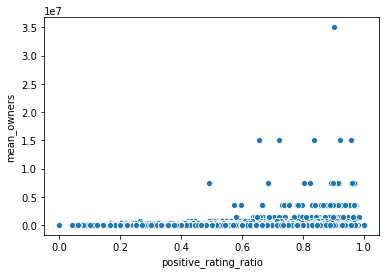

In [148]:
seaborn.scatterplot(indie_data['positive_rating_ratio'],indie_data['mean_owners'])

Looking at the data here, there's clearly a positive trend with high-review ratio to number of owners! 
That's good news for us, that's a result. 

Of course, this is a pretty obvious one. If people see good reviews on a game, they're going to be more likely to hit buy. Let's do some more digging, see if we can find anything else.

Maybe average play-time is a good predictor? 

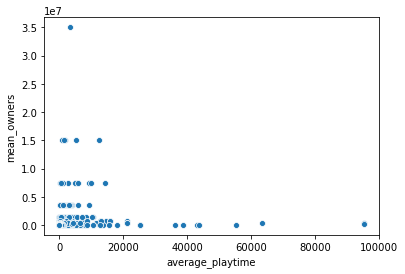

In [149]:
seaborn.scatterplot(indie_data['average_playtime'],indie_data['mean_owners'])

Average playtime above looks as though it would have a negative linear relationship to sales, which doesn't seem right at all. It seems like the average playtimes are just really low over all, so most games don't have anywhere near the maximum. We'll steer clear of this. 

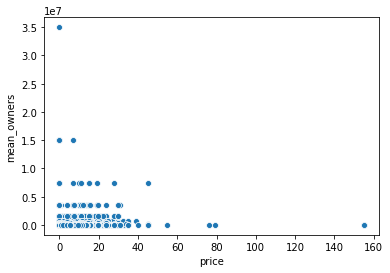

In [150]:
seaborn.scatterplot(indie_data['price'],indie_data['mean_owners'])

Again, here's a result we can work with. 

No one buys 160 dollar games, first of all. 

the most almos all games fall within the 0-40 dollar range, with the hot spot looking like around 15-20 dollars. 

That makes sense for us Indies, unless you're Arc, you can't charge 60 dollars for your game.

(if you're unfamiliar with Arc: [Look here](https://ark.gamepedia.com/ARK_Survival_Evolved_Wiki) ) it's a large indie game, it released for a staggering 60 dollars. Most indie games are in the 15-20 dollar range, which is supported by our plot above. 


So we've explored our data, and we know that at least generally, there are trends here, but let's 
get formal about that before we go too far. 

### HYPOTHESIS TESTING
Lets fit regressions to the price and ratings graph, to quantatatively determine the relationships that we eyeballed above. 

This is one application for hypothesis testing. 

I'll explain more later, but for now let's just say that our hypothesis is that there is a linear relationship between positive_rating_ratio, and mean_owners. As well as between price and mean_owners

In [151]:
from scipy import stats
import numpy as np
# fit a linear regression to the data
stats.linregress(indie_data['positive_rating_ratio'],indie_data['mean_owners'])

LinregressResult(slope=99152.03982418025, intercept=3524.1313072344055, rvalue=0.049866130184749516, pvalue=3.575841583430046e-12, stderr=14251.254665304314)

In [152]:
stats.linregress(indie_data['price'],indie_data['mean_owners'])

LinregressResult(slope=4263.038749392793, intercept=53529.80630143328, rvalue=0.04814415859823838, pvalue=1.9115848468685684e-11, stderr=634.7015072861445)

Our Hypothesis as stated above is that there is some kind of linear trend between our fields of interest. 

It would be nice if we could directly confirm that, however, statistics is a lot better at rejecting things. 

There's a lot to unpack in this subject, so I would point the interested reader [here](https://www.statisticshowto.com/probability-and-statistics/hypothesis-testing/)

The punchline is that a small p-value for a particular hypothesis is good, in our case they are tiny, (effectively zero) so we can safely reject the null-hypothesis of no-correlation! 

we now know what our eyes were telling us,  that there are trends in price vs sales, and ratings vs sales. 


Knowing that we have correlations here doesn't give us anything actionable. 
After all, the goal of this whole project is to find insights in the data that give us a policy with which we can 
better target game markets on steam! It's good that high-reviewed games sell well, but we can't directly control good reviews. 
 

We want to find some parameters that the developer can control directly, which give us the best chance at success. 

Our first metric, positivity rating ratio also had a strong trend in sales prices. It's true that we can't control ratings directly, but it's possible that it can give us information on parameters we can control.

The same is true of the price graph, we can't necessarily control the price that people are willing to pay for the game, but that information could lead us in the right direction. 

Let's try for that

We've established over-all trends in positive ratings and sales numbers, but we'd like to know how to correlate controllable choices and sales numbers. to make that harder, Sales are probably always going to depend on ratings in some way, so we're working with a *mutlivariate system*. meaning simply that the outcome depends on more than one thing. 

In our case, the sales numbers depend on rating, but they likely also depend on other things. For instance, it's a commonly known idea within the game development world that any game is fun with friends, therefore it's resonable to assume that even a poorly made game (one which recieves low positive ratings) might do well simply because it is multiplayer. Let's try that out by re-creating the same plots as above, but on the subset of games that are multiplayer:

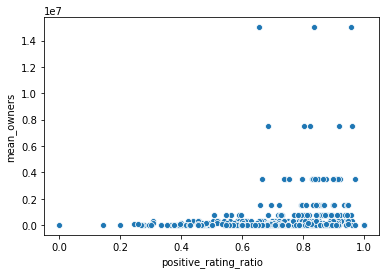

In [153]:
#get the subset of indie games that are also Mutliplayer
multiplayer_indie_data = indie_data[ indie_data['steamspy_tags'].str.contains('Multiplayer')]
#plot the same relationships as above
seaborn.scatterplot(multiplayer_indie_data['positive_rating_ratio'],multiplayer_indie_data['mean_owners'])


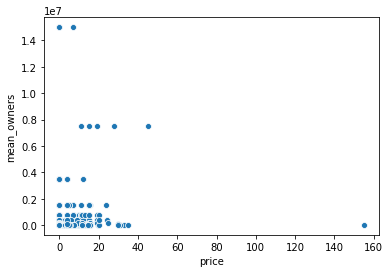

In [154]:
seaborn.scatterplot(multiplayer_indie_data['price'],multiplayer_indie_data['mean_owners'])

So what does this tell us? 

Firstly, let's look at the ownership-price plot. This isn't significatly different than the plot before it. 
This isn't overly surprising, price is controlled by a lot of exernal factors beyond just how people feel about multiplayer. That said, this lack of variablility by tag is a bad sign. Let's abandon price as a parameter, and focus just on positivity_rating_ratio. 

the positivity_rating_ratio plot is much more positive. Compared to the original ownership/rating_ratio plot we have less skwed data. 


This means that we have a better chance of selling more copies, even if our ratings numbers are lower than we would like. This could happen for a number of reasons, but the important take-away here is that we can increase the chances that our game will sell more copies without the need to score a very high positive rating ratio. 

This leads me to think that features (roughly denoted in steam-api as steamspy_tags) are our best control variables for high sales numbers. After all, the goal of this tutorial was to find parameters that a developer can control during the production of a game which maximize her chances of selling enough copies to continue being an indie developer. steamspy_tags appears to have a meaningful impact on the number of copies sold at a particular positivity rating, so maybe we can learn a set of tags that maximize sales numbers. Let's try that now. 


First, it would be nice to have a set of tags that exist, up until now I've been leaning on domain knowledge to make inspired guesses about which tags might be useful. We can do better. 


In [155]:
#get the set of steamspy_tags in use by our steam dataset.

def get_unique_tags(game_data_frame):
    unique_tags = set()#create an empty set (a list which doesn't allow duplicate entries)
    for tag_string in game_data_frame['steamspy_tags']:
        tag_list = tag_string.split(";")#steamspy_tags are formatted like "tag1;tag2;tag3;...""
        for tag in tag_list:
            unique_tags.add(tag)
            
    return unique_tags


Great! Now we have a list of all the tags that exist, the next step is to transform this information into something that a machine learning algorithm can chew on by performing 'one hot encoding'. this involves creating a set of orthogonal unit vectors for all of the tags in our list, and adding them together where appropriate to represent all of the tag combinations we have in our data set! (it sounds a lot scarier than it is, but if you want to know more about it, look [here](https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f) )

Let's do it now: 

In [156]:
import pdb
#generate feture vectors for each tag_set
def one_hot_tags(game_data_frame):
    #the first thing we need is our unique tags, 
    unique_tags = get_unique_tags(game_data_frame)
    
    for tag in unique_tags:
        #for each tag, populate a row with ones if that row's steam tags contain the tag
        game_data_frame[tag] = game_data_frame['steamspy_tags'].str.contains(tag).astype(float)
        #then divide by the square root of the count of ones (this normalizes the encoding so our features work out)
        game_data_frame[tag] = game_data_frame[tag]/np.sqrt(game_data_frame['steamspy_tags'].str.count(';')+1)

    return game_data_frame
 

In [157]:
encoded_indie_data = one_hot_tags(indie_data)#create one-hot-encoded data
encoded_indie_data

,name,publisher,categories,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,...,Shoot 'Em Up,PvP,Programming,Character Customization,Fighting,e-sports,Spelling,2D Fighter,Sports,3D Platformer
26,Rag Doll Kung Fu,Mark Healey,Single-player;Multi-player,Indie;Fighting;Multiplayer,0,40,17,0,0,20000-50000,...,0.0,0.0,0.0,0.0,0.57735,0.0,0.0,0.0,0.0,0.0
30,Darwinia,Introversion Software,Single-player,Strategy;Indie;RTS,0,472,158,182,273,500000-1000000,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0
31,Uplink,Introversion Software,Single-player,Hacking;Indie;Strategy,0,1602,152,65,77,500000-1000000,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0
32,DEFCON,Introversion Software,Single-player;Multi-player,Strategy;Indie;Multiplayer,22,2057,344,80,119,500000-1000000,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0
33,Multiwinia,Introversion Software,Single-player;Multi-player;Steam Achievements,Indie;RTS;Strategy,12,368,75,121,224,500000-1000000,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27070,Room of Pandora,SHEN JIAWEI,Single-player;Steam Achievements,Adventure;Indie;Casual,7,3,0,0,0,0-20000,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0
27071,Cyber Gun,BekkerDev Studio,Single-player,Action;Indie;Adventure,0,8,1,0,0,0-20000,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0
27072,Super Star Blast,EntwicklerX,Single-player;Multi-player;Co-op;Shared/Split ...,Action;Indie;Casual,24,0,1,0,0,0-20000,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0
27073,New Yankee 7: Deer Hunters,Alawar Entertainment,Single-player;Steam Cloud,Indie;Casual;Adventure,0,2,0,0,0,0-20000,...,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0


All we did is add columns for each unique steam_spy_tag. Then, for each row, if the row has that tag in it, the value for that (tag,row) = 1, otherwise that value is zero. 
Then we divided by the square root of the number of tags in that row, which is called normalization. 
Normalization prevents rows with a lot of tags from being numerically larger than a row with fewer, it keeps things fair. 

With our data encoded, we can start to think about what sorts of models we might have luck with. 

## Training our first model

Let's start with a linear regression model, which will return something like this: 

mean_owners/positivity_rating_ratio = s1(Multiplayer)+s2(RPG)+s3(Sports).... for all the tags. 

s1, s2 and so on are called coefficients, they are multiplied by the variables Multiplayer, RPG, and so on, which are either 0, or 1 as we have defined them, and added up to give us an estimated ownership/positivity_ratio fraction. 

The regression will find coefficients for each of the tags we put in, larger coefficients mean that the associated tag contributes to a higher mean_owners/positivity_ratio, while smaller coefficients contribute less. 

We're going to have about 300 coeffiecients, so we should have quite the list. 

Scikit learn has a very powerful LinearRegression model which can figure out all 300 of those coefficients, let's use it here: 

In [158]:

from sklearn.linear_model import LinearRegression

unique_tags = get_unique_tags(indie_data)#generate the unique tags using our function above

X  = encoded_indie_data[unique_tags]#use the encoded feature vectors for x inputs

#Divide the mean_owners column by the positivity_rating_ratio column, this gives us the slope of our plots
#of mean_owners vs positivity_ratio above. Maximizing this number gives us more sales per positive rating
Y = encoded_indie_data['mean_owners']/(encoded_indie_data['positive_rating_ratio']+.00000001)

#perform linear regression
model = LinearRegression().fit(X,Y)

#build a list of tags to tag weights
importance_dict  = {}
for idx,tag in enumerate(unique_tags): 
    importance_dict[tag] = model.coef_[idx]
    
#convert the dict to a series for easier use, sort the series in descending order
pandas.Series(importance_dict).sort_values(ascending = False)

Motorbike                  8.209359e+22
Snowboarding               1.078891e+22
Character Customization    4.333967e+21
Basketball                 7.409416e+11
Football                   2.245841e+11
                               ...     
VR Only                   -1.322312e+11
Rome                      -1.397854e+11
Real Time Tactics         -4.333967e+21
Snow                      -1.078891e+22
Motocross                 -8.209359e+22
Length: 300, dtype: float64

Oh boy, those are some very, very big numbers. Unfortunately, Linear regressions have an issue when you try to fit a large number of parameters where they let their coefficients get huge. This can lead to bad models, because the importance of features can get washed out by the huge numbers. 

This is an important lesson in data science, not every model is good at everything, knowing how your models work allows you to make informed decisions about when a model is working, or when it may not be. 

## Training our second model

a Linear regression is what we want, though, because the coefficients offer a natural ranking system for features. 
Fortnately, there is a modified linear regression that exists, which forces the model to keep the coefficients small! it's called a Ridge regression, and scikit learn has it too:

Let's repeat our previous process above, with a Ridge regression instead. 

In [159]:
from sklearn.linear_model import Ridge #ridge regression, regularized linear regression
linear_model = Ridge(alpha = 10)#alpha controls how firmly the regularization is applied, let's try 10, 
linear_model.fit(X,Y)


#build a name-value list of the steam tag - coeficient in the regression
linear_importance_dict  = {}
for idx,tag in enumerate(unique_tags): 
    linear_importance_dict[tag] = linear_model.coef_[idx]
    
#convert to a series with series dictionary constructor
linear_importance_list = pandas.Series(linear_importance_dict).sort_values(ascending = False)
#return sorted output for ranking
lin_sales_from_pos_rev_series = pandas.Series(linear_importance_list).sort_values(ascending = False)


Okay this looks a lot more resonable. 
Let's interpret these results and make some policy decisions! 
We fit a linear regression, meaning that each coefficient there is a slope! The units are 'sales/positive ratings/tag' obviously since we have binary tags (either zero or one) the interpretation in english is a bit silly, but the punch line is this: 

positive numbers, especially large positive numbers are good. Small numbers don't matter, and negative numbers, especially large negative numbers, are bad. 

The idea with this model is that large numbers of these coefficients mean that the presence of those tags increase the number of sales you get per positive rating, i.e a game with a really high slope in that category could get only 50% positive reviews, and outsell somethign with 100% positive reviews. 

That's the window we set out to explore!

With the data in front of us, it looks like the best thing you can possibly do is make a sports game, followed by pirate games, followed by the all-time beloved metroid-vania games. if you're not sure what I mean when I say all-time beloved, read here: 

https://www.gamasutra.com/view/news/236410/The_undying_allure_of_the_Metroidvania.php

## Looking at new perspectives
We now have one metric that we can use, but it would be nice to have more. Plus, we've only scratched the surface of what we can do with machine learning! 

Above, we determined the set of coefficients which strongly correlated with high sales per positive review, this is a good tool, but we can do a lot more. 

We did the above with a regression, we essentially fit a line, and then looked at what parameters made up that line, and use those parameters to infer something about the tags. 

Next, let's to try to predict if a game will sell above a certain threshold of copies, based on the other data in that we have about it. 

This is called a classification, and roughly what I want to do is classify a game as 'successful' or 'unsucessful' based on the data we already have. 

First, let's define 'successful' in terms of the data we have. 


Let's do some more exploratory analysis for this new goal: 

can we classify based on number of owners? 

In [160]:
indie_data['mean_owners'].describe()#get a good idea of how the data is laid out. 

count    1.942000e+04
mean     7.505716e+04
std      4.626652e+05
min      1.000000e+04
25%      1.000000e+04
50%      1.000000e+04
75%      3.500000e+04
max      3.500000e+07
Name: mean_owners, dtype: float64

In [161]:
np.sort(indie_data['mean_owners'].unique())#list the mean_owners classes in order

array([1.0e+04, 3.5e+04, 7.5e+04, 1.5e+05, 3.5e+05, 7.5e+05, 1.5e+06,
       3.5e+06, 7.5e+06, 1.5e+07, 3.5e+07])

Looking at the data here, the distribution is highly skewed towards the bottom. The 25% and 50% medians (lower fourth and true median) (see information on [descriptive statistics](https://en.wikipedia.org/wiki/Descriptive_statistics))
are equal, and it's not until the upper fourth that we see the median indie game reach even the second sales level. 
This means that any indie game that is above the first sales level is very unusual despite being below the mean. 

Therfore, I will classify any game which exceeds the first sales class as successful: 

In [162]:
indie_data['successful'] = (indie_data['mean_owners']>1.0e4).astype(int)#1 if the game is sucessful, zero otherwise


so, 5276 games out of the 19000 inide games we have are successful. Let's see if we can make a model that knows why. 

## Logistic Regression:
 Logistic regression though named the same, asks a very different question to a linear regression. 
 a Linear regression asks 'what are the slopes of these variables if they form a line?' where logistic regression asks 'what is the probability that these values are in a category?' 
    This makes it useful for the question of 'given these steam tags, what is the probability that my game is in the sucessful category?' which is the question we hope to answer. 
    


In [163]:
from sklearn.linear_model import LogisticRegression
X = indie_data[unique_tags]
Y = indie_data['successful']
log_success_model = LogisticRegression().fit(X,Y)

log_success_model.score(X,Y)#with a model score of .8 we have a model that on average the model guesses right 80% of the time.


0.790010298661174

There we have it, A classifier which accepts a set of unique_tags, and predicts if the game will be sucessful, or unsuccessful. 

Let's see what the coefficients look like:

In [164]:
log_success_importance_dict = {}
for idx,tag in enumerate(unique_tags):
    log_success_importance_dict[tag] = log_model.coef_[0][idx]

log_success_series = pandas.Series(log_importance_dict).sort_values(ascending = False)

## Assessment of logistic regression on success: 
We've fit a model on the same parameters, but looking at a different outcome. We defined success as those which sell much better than the typical indie game. From that classification, we have the most highly weighted and most negatively weighted games in terms of success. 
    
From domain knowledge, this again looks resonable. open world, free to play, multiplayer. All very common phrases when talking about popular games. This actually doesn't line up with our linear regressor, which isn't horribly surprising. As stated, we're measuring different things. 
    
  Let's iterate through the data science pipeline one more time, and find one more ranking to guide us. 
  
  This time, let's try to predict good reviews. Also by classification. 
  
  From our charts during our original exploratory data analysis (EDA if you're cool) we saw that high sales games were cluseterd towards the top of the high reviews range. Let's classify a well reviewed game as anything with higher than .8 positive review ratio

In [165]:
indie_data['well_reviewed'] = (indie_data['positive_rating_ratio']>.8).astype(int)
indie_data['well_reviewed'].sum()

8545

so about 40% of games are well reviewed by our metric, let's see how we can use this, and try out one more type of classifier while we're at it. 

## Decision Trees:
Decision trees are very different from either a linear or logistic regression. Rather than try to fit a function, a tree *approximates a boolean function*. in this case our boolean function is: "will my game be well reviwied based on these steam tags?" This is a question that the decision tree answers by splitting itself on the various attributes we give it. Which are, Multiplayer or not, Sports or not, ect. Given these parameters the tree will structure itself such that it's good at answering that question, and then we can get a list of 'importances' from it. Basically 'what were the most important factors in your decision' That knowledge will be roughtly 1-1 comparison with our linear-models, so we can see things apples to apples. 
    

In [166]:
from sklearn.tree import DecisionTreeClassifier
X = indie_data[unique_tags]
Y = indie_data['well_reviewed']
tree_reviews_model = DecisionTreeClassifier().fit(X,Y)

tree_reviews_importances = tree_reviews_model.feature_importances_

In [167]:
tree_reviews_importance_dict = {}
for idx, tag in enumerate(unique_tags):
    tree_reviews_importance_dict[tag] = tree_reviews_importances[idx]


tree_reviews_series = pandas.Series(tree_reviews_importance_dict)

tree_reviews_series.sort_values(ascending = False)

Indie                   0.058685
Puzzle                  0.054826
Action                  0.034812
Simulation              0.034100
Early Access            0.029136
                          ...   
Logic                   0.000000
Quick-Time Events       0.000000
Real-Time with Pause    0.000000
Hunting                 0.000000
Snowboarding            0.000000
Length: 300, dtype: float64

## Analysis of Decision tree fit on good reviews:
The decision tree produced some really interesting results. However, we need to take care here when assessing the tree. The tree doesn't have the the same concept of positive and negative as the regressions do, infact, the only thing the tree cares about is 'which feature lets me eliminate the majority of the rest of the chocies I have' Which is equivalent to saying 'which of these features gives me the most information about the question' 
    see : [how decision trees makes decisions](https://towardsdatascience.com/entropy-how-decision-trees-make-decisions-2946b9c18c8)
    
This means that we can't just take the top five values as the best deciding factors, instead we understand that a high value means that the feature is important, but it could be a good thing or a bad thing in terms of your games' reviews. Infact,  it's more likely a bad thing because there are many more negative outcome leaves than positive ones. (because there are so many more poorly reviewed games than positive)


## Making alternate models for additional insight
As a bonus, let's also compute the logistic regression of well_reviewed for comparison, and the decision_tree classification for successful. Doing this lets us see the data from another angle, and we already have the data curated and clean. We might as well

In [168]:

#repeat the well reviewed classification with a logistic regression model
X = sklearn.preprocessing.scale(indie_data[unique_tags])
Y = indie_data['well_reviewed']
log_reviews_model = LogisticRegression().fit(X,Y)
#repeat the successful classification with a decision tree model
X = indie_data[unique_tags]
Y = indie_data['successful']
tree_success_model = DecisionTreeClassifier().fit(X,Y)

#populate the importance - tag dicts
log_reviews_dict = {}
tree_success_dict = {}
for idx, tag in enumerate(unique_tags):
    tree_success_dict[tag] = tree_success_model.feature_importances_[idx]
    log_reviews_dict[tag] = log_reviews_model.coef_[0][idx]
#convert the dicts to series 
log_reviews_series = pandas.Series(log_reviews_dict)
tree_success_series = pandas.Series(tree_success_dict) 

In [169]:
log_reviews_series.sort_values(ascending = False)[0:10]

Psychological     0.220791
Puzzle            0.209085
Sokoban           0.157883
Dark Humor        0.143098
Visual Novel      0.139809
Mini Golf         0.136990
Baseball          0.134243
Pixel Graphics    0.114711
Replay Value      0.114144
Vampire           0.113597
dtype: float64

In [170]:
tree_success_series.sort_values(ascending = False)

Free to Play            0.140894
Indie                   0.120906
Early Access            0.075832
Casual                  0.058315
Action                  0.057827
                          ...   
Agriculture             0.000000
Snow                    0.000000
Animation & Modeling    0.000000
Utilities               0.000000
Old School              0.000000
Length: 300, dtype: float64

## Recap

First, we fit a linear regression model which gives us the sales/ratio_of_positive_reviews ratio per tag set
Then, we did a follow up analysis where we ultimately fit a logistic regression and decision tree for the two 

following classification problems: 
will my game be in a higher sales group than the first

will my game be reviwed higher than 80% positive. 

This gave us a total of five models.  

lin_sales_from_pos_reviews

log_success
tree_success

log_reviews
tree_reviews


With these models, we now have a set of tests we can run per tag we as a developer choose to use.
## ANALYSIS
Okay, so how can we use these models we've created? Well, there are probably lots of ways, but the most obvious is to see which tags are consistently positive, or consistently negative accross all or a majority vote of our models. 

Lets try this with the tag we started with, Multiplayer. 

In [178]:
print("logsitic regression for successful : %3f" %(log_success_series['Multiplayer']/np.max(log_success_series)))
print("logistic regression for well reviewed : %3f" %(log_reviews_series['Multiplayer']/np.max(log_reviews_series)))
print("tree signifiance for success : %3f" % (tree_success_series['Multiplayer']/np.max(tree_success_series)))
print("tree significance for reviews: %3f" %(tree_reviews_series['Multiplayer']/np.max(tree_reviews_series)))
print("linear sales per positive review: %3f"%(lin_sales_from_pos_rev_series['Multiplayer']/np.max(lin_sales_from_pos_rev_series)))

logsitic regression for successful : 0.778727
logistic regression for well reviewed : 0.231740
tree signifiance for success : 0.049809
tree significance for reviews: 0.192506
linear sales per positive review: -0.318754


This certainly adds more dimension to our decision. During my analysis I decided to normalize the ratings, that way everything is on the same scale. 

What we find then, is that according to the logistic regressions, muliplayer contributes significatly to the probability of selling a lot, but not highly to the probability of being well reviwed. According to the trees Multiplayer isn't much of a deciding factor for either success or reviews, and in the case of the liner regression it is a moderate reducer of the slope of sales per positive review. 

More than anything, these results indicate that the models and analysis that I've developed over the course of this tutorial need iteration and refinement. However, the logistic regressions and the linear model agree. The idea would be that a completely flat line would occur when Multiplayer completely removes the dependence on being well reviewed. A lower slope, combined with a low impact on the probability of being successful lend creedence to the idea that having multiplayer lessens the impact of the reviews curve on the sales of the game, as we initially guessed. 


### Conclusions
We set out to determine a set of knobs that the developer could tweak on her game to maximize her chances of being successful, and to learn about data science along the way. To do that we created several models from the data, each of which are functions of the steamspy tags which roughly correspond to the features of her game. These models are interesting, and certainly warrant testing, and further exploration (perhaps one could even make a machine learning model that learned on the output of these models!). More importantly, though, we explored how we can start to quantify what makes a game successful, learned new tools for predicting outcomes on those quantities, and methods for evaluating the policies that we come up with after those outcomes have been predicted. We didn't find the silver bullet to making a super high-selling steam game, but we do now have a lot more information on what works, and what doesn't, and with that we can inform the many boarderline decisions that developers have to make on their journey to indie success. 

Thanks for reading! 